In [1]:
from sklearn.metrics import confusion_matrix
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
file1_path = "/mnt/data05/shared/pdutta_data/DNABERT_data/ft/prom_pred_19122021_lr/2021-12-20_10:56:52_result/6/pred_results.npy"

In [3]:
pred_torch= torch.from_numpy(np.load(file1_path))

In [4]:
pred_torch

tensor([0.1926, 0.1088, 0.5231,  ..., 0.5369, 0.3087, 0.2400])

In [5]:
t = torch.Tensor([0.5])

In [6]:
pred_out = (pred_torch > t).float() * 1

In [7]:
pred_out

tensor([0., 0., 1.,  ..., 1., 0., 0.])

In [8]:
pred_out.shape

torch.Size([21660])

In [9]:
pred_out.numpy()

array([0., 0., 1., ..., 1., 0., 0.], dtype=float32)

In [10]:
dev_tsv = pd.read_csv("/mnt/data05/shared/pdutta_data/DNABERT_data/Promoter_prediction/dev.tsv",sep= "\t")

In [11]:
dev_tsv.groupby(['label']).size()

label
0    11000
1    10660
dtype: int64

In [12]:
actual_pred = dev_tsv['label'].to_numpy()

In [13]:
actual_pred

array([1, 0, 1, ..., 1, 1, 0])

In [14]:
cf_matrix = confusion_matrix(actual_pred, pred_out.numpy())

In [15]:
cf_matrix

array([[9557, 1443],
       [3047, 7613]])

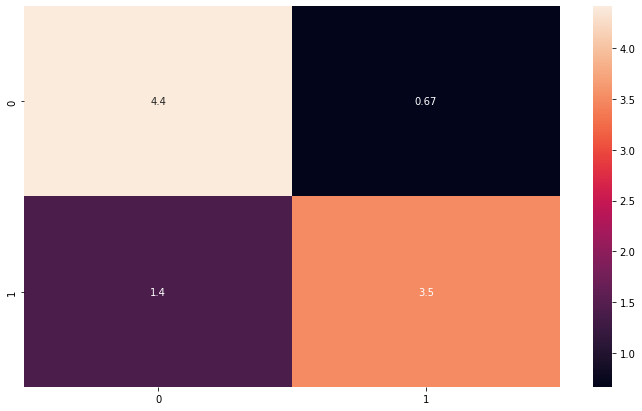

In [16]:
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in range(2)],
                     columns = [i for i in range(2)])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [17]:
class_accuracy=100*cf_matrix.diagonal()/cf_matrix.sum(1)
print(class_accuracy)

[86.88181818 71.41651032]
